In [98]:
import pytimber as pt
import matplotlib.pyplot as plt
from nxcals.spark_session_builder import get_or_create
from nxcals.api.extraction.data.builders import DataQuery
from datetime import datetime, timezone, timedelta

import xobjects as xo
import xtrack as xt
import xpart as xp
import xcoll as xc

import numpy as np
import scipy.optimize as opt
import scipy.optimize as opt
from scipy.special import erf
from scipy.stats import norm

In [2]:
spark = get_or_create("My_APP")


ENVIRONMENT:
NXCALS_VERSION=1.5.8
VIRTUAL_ENV=
SPARK_HOME=/home/cmaccani/anaconda3/nxcals-bundle
SPARK_CONF_DIR=/tmp/cmaccani/nxcals-a3e0836dfec1b3b0ad0b1bd785a21fb6/conf
SPARK_DEFAULTS=/home/cmaccani/anaconda3/nxcals-bundle/conf/spark-defaults.conf
NXCALS_WORKSPACE_TEMP_DIR=/tmp/cmaccani/nxcals-a3e0836dfec1b3b0ad0b1bd785a21fb6
PACKED_VENV_FILE=/tmp/cmaccani/nxcals-a3e0836dfec1b3b0ad0b1bd785a21fb6/nxcals-python3-env.tar.gz
PYSPARK_PYTHON=/home/cmaccani/anaconda3/bin/python
PYSPARK_DRIVER_PYTHON=/bin/python
PYSPARK_DRIVER_PYTHON_OPTS=
LOCK=/tmp/cmaccani/nxcals-a3e0836dfec1b3b0ad0b1bd785a21fb6/.lock

IMPORTANT:
Rebuilding of the packed venv is required in cases there are new or modified packages provided by a user. In order to recreate the packed venv please:
        - remove the file (rm /tmp/cmaccani/nxcals-a3e0836dfec1b3b0ad0b1bd785a21fb6/nxcals-python3-env.tar.gz)
        - execute your script again (rebuild will be performed during the startup of PySpark/Python)
Target directory can

In [3]:
lbd = pt.LoggingDB(source='nxcals', spark_session=spark)

In [4]:
blm_name = 'BLMTI.04L7.B1E10_TCSG.D4L7.B1:LOSS_RS09'
tMin_bkg = '2024-03-21 07:52:15.000'
tMax_bkg  = '2024-03-21 07:52:45.000'
tMin = '2024-03-21 07:52:47.000'
tMax = '2024-03-21 07:53:25.000'

In [5]:
data = lbd.get(blm_name, tMin_bkg , tMax )

/home/cmaccani/anaconda3/lib/python3.11/site-packages/pytimber/data.py:270: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ).dt.to_pydatetime()


In [6]:
time = data[blm_name][0]
signal =  data[blm_name][1]

In [7]:

def datestring_to_timestamp_utc(date_string):
    # Parse the date string into a datetime object
    date_obj = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S.%f') - timedelta(hours=2)
    
    # Convert the datetime object to UTC timezone if it's not already in UTC
    if date_obj.tzinfo is None or date_obj.tzinfo.utcoffset(date_obj) is None:
        date_obj = date_obj.replace(tzinfo=timezone.utc)
    else:
        date_obj = date_obj.astimezone(timezone.utc)
    
    # Extract the timestamp in seconds
    timestamp_utc = date_obj.timestamp()
    
    return timestamp_utc

In [8]:
time[0]

1711000335.000363

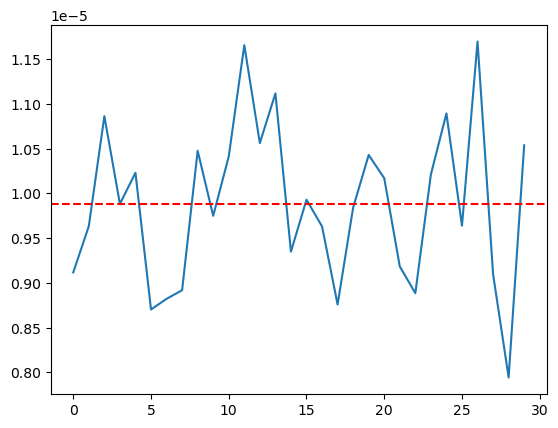

In [9]:
BLM_bkg = signal[np.where((np.round(time) ==  datestring_to_timestamp_utc(tMin_bkg)))[0][0]:np.where((np.round(time) ==  datestring_to_timestamp_utc(tMax_bkg)))[0][0]]
time_bkg = time[np.where((np.round(time) ==  datestring_to_timestamp_utc(tMin_bkg)))[0][0]:np.where((np.round(time) ==  datestring_to_timestamp_utc(tMax_bkg)))[0][0]]
Delta_time_bkg = np.array([i - time_bkg[0] for i in time_bkg])
bkg_mean = np.mean(BLM_bkg)

fig, ax = plt.subplots()
ax.plot(Delta_time_bkg, BLM_bkg)
ax.axhline(y=bkg_mean, color='r', linestyle='--')

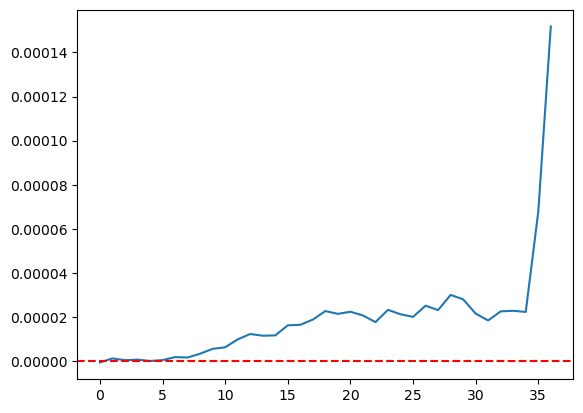

In [10]:
BLM_scan = signal[np.where((np.round(time) ==  datestring_to_timestamp_utc(tMin)))[0][0]:np.where((np.round(time) ==  datestring_to_timestamp_utc(tMax)-1))[0][0]]
time_scan = time[np.where((np.round(time) ==  datestring_to_timestamp_utc(tMin)))[0][0]:np.where((np.round(time) ==  datestring_to_timestamp_utc(tMax)-1))[0][0]]
Delta_time_scan= np.array([i - time_scan[0] for i in time_scan])
BLM_scan = BLM_scan - bkg_mean

fig, ax = plt.subplots()
ax.plot(Delta_time_scan, BLM_scan)
ax.axhline(y=0, color='r', linestyle='--')

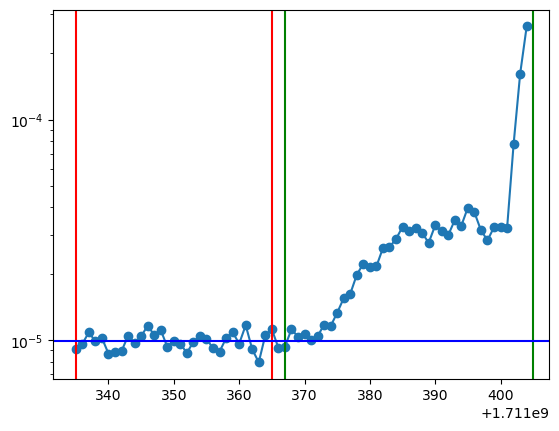

In [11]:
fig, ax = plt.subplots()
plt.plot(time, signal, marker='o')
ax.axvline(datestring_to_timestamp_utc(tMin_bkg), color = 'r')
ax.axvline(datestring_to_timestamp_utc(tMax_bkg), color = 'r')
ax.axvline(datestring_to_timestamp_utc(tMin), color = 'g')
ax.axvline(datestring_to_timestamp_utc(tMax), color = 'g')
ax.axhline(bkg_mean, color = 'b')
ax.set_yscale('log')

In [12]:
cry_metadata = 'BLMTI.06L7.B1E10_TCPCV.A6L7.B1:LOSS_RS09'

/home/cmaccani/anaconda3/lib/python3.11/site-packages/pytimber/data.py:270: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ).dt.to_pydatetime()


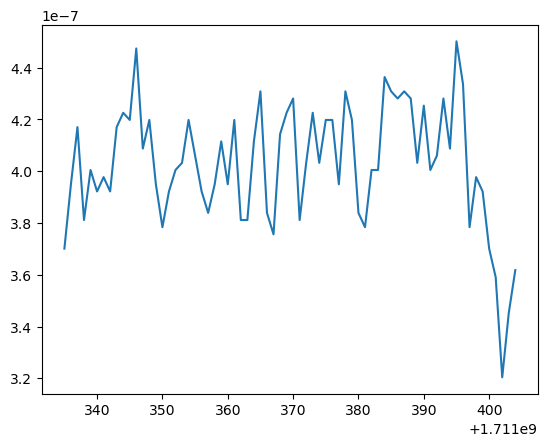

In [13]:
blm_cry = lbd.get(cry_metadata, tMin_bkg , tMax )[cry_metadata][1]

plt.plot(time, blm_cry)

In [14]:
lin_metadata = 'TCSG.D4L7.B1:MEAS_MOTOR_LU'
pos_coll = lbd.get(lin_metadata, tMin_bkg , tMax )[lin_metadata][1]

/home/cmaccani/anaconda3/lib/python3.11/site-packages/pytimber/data.py:270: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ).dt.to_pydatetime()


In [15]:
pos_coll_signal = pos_coll[np.where((np.round(time) ==  datestring_to_timestamp_utc(tMin)))[0][0]:np.where((np.round(time) ==  datestring_to_timestamp_utc(tMax)-1))[0][0]]

In [16]:
int_metadata = 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY'
beam_intensity = lbd.get(int_metadata, tMin_bkg , tMax )[int_metadata][1]

/home/cmaccani/anaconda3/lib/python3.11/site-packages/pytimber/data.py:270: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ).dt.to_pydatetime()


(0.0, 4e-05)

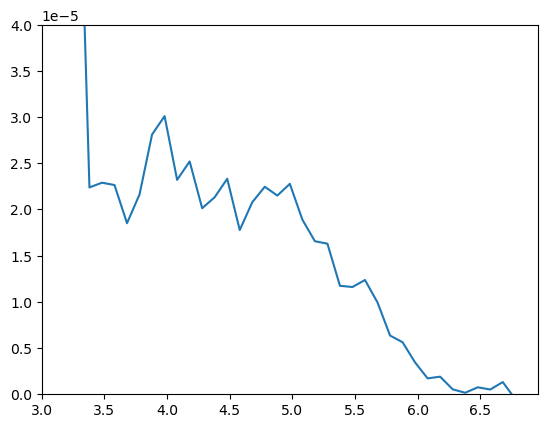

In [17]:
fig, ax = plt.subplots()
ax.plot(pos_coll_signal, BLM_scan)
ax.set_ylim(0, 0.00004)

In [18]:
MeanCollPos = []
SignalBLMRedu = []
SignalBLMErr = []
SignalCRYRedu = []
BeamIntRedu = []
DeltaBLMRedu = []

i = 1

while i < len(pos_coll_signal):
    count = 1
    SumPos = pos_coll_signal[i-1]
    BLMmean = []
    CRYmean = []
    Intmean = []
    DeltaBLMmean = []
    BLMmean.append(BLM_scan[i-1])
    CRYmean.append(blm_cry[i-1])
    Intmean.append(beam_intensity[i-1])
    DeltaBLMmean.append(Delta_time_scan[i-1])

    # if the absorber stays in the same position for more than one measurement, compoute the mean of the signals
    while pos_coll_signal[i] == pos_coll_signal[i-1]:
        
        count += 1
        SumPos += pos_coll_signal[i]
        BLMmean.append(BLM_scan[i])
        CRYmean.append(blm_cry[i])
        Intmean.append(beam_intensity[i])
        DeltaBLMmean.append(Delta_time_scan[i])
        i = i+1
        if i == len(pos_coll_signal):
            break
        
    MeanCollPos.append(round(SumPos/count,3))
    SignalBLMRedu.append(sum(BLMmean)/count)
    SignalBLMErr.append((max(BLMmean)-min(BLMmean))/2.)
    SignalCRYRedu.append(sum(CRYmean)/count)
    BeamIntRedu.append(sum(Intmean)/count)
    DeltaBLMRedu.append(round(sum(DeltaBLMmean)/count,3))
    i = i+1

In [21]:
"""line_path = './input_files/2024_Run3/injection_b1.json'
coll_file = './input_files/colldbs/injection.yaml'

line = xt.Line.from_json(line_path)
#context = xo.ContextCpu() 
#coll_manager = xc.CollimatorManager.from_yaml(coll_file, line=line, beam=beam, _context=context, ignore_crystals=False)
#coll_names = coll_manager.collimator_names
#not_install = ['tccs.5r3.b2', 'tccp.4l3.b2', 'target.4l3.b2']
#everest_colls = [name for name in coll_names if name not in not_install]
#coll_manager.install_everest_collimators(names=everest_colls, verbose=False)
tw = line.twiss(method = '4d')

CRY_name = 'TCPCV.A6L7.B1'.lower()
COLL_name = 'TCSG.D4L7.B1'.lower()

deltaphi = float(tw[tw.name == COLL_name]['muy'])% 1* 2*np.pi - float(tw[tw.name == CRY_name]['muy'])% 1* 2*np.pi


beta1 = tw['bety',CRY_name]
beta2 = tw['bety',COLL_name]
alpha1 = tw['alphy',CRY_name]
alpha2 = tw['alphy',COLL_name]"""

"line_path = './input_files/2024_Run3/injection_b1.json'\ncoll_file = './input_files/colldbs/injection.yaml'\n\nline = xt.Line.from_json(line_path)\n#context = xo.ContextCpu() \n#coll_manager = xc.CollimatorManager.from_yaml(coll_file, line=line, beam=beam, _context=context, ignore_crystals=False)\n#coll_names = coll_manager.collimator_names\n#not_install = ['tccs.5r3.b2', 'tccp.4l3.b2', 'target.4l3.b2']\n#everest_colls = [name for name in coll_names if name not in not_install]\n#coll_manager.install_everest_collimators(names=everest_colls, verbose=False)\ntw = line.twiss(method = '4d')\n\nCRY_name = 'TCPCV.A6L7.B1'.lower()\nCOLL_name = 'TCSG.D4L7.B1'.lower()\n\ndeltaphi = float(tw[tw.name == COLL_name]['muy'])% 1* 2*np.pi - float(tw[tw.name == CRY_name]['muy'])% 1* 2*np.pi\n\n\nbeta1 = tw['bety',CRY_name]\nbeta2 = tw['bety',COLL_name]\nalpha1 = tw['alphy',CRY_name]\nalpha2 = tw['alphy',COLL_name]"

In [22]:
# manipulate data

energy = 450
mp = 0.9382
emittance_n = 3.5e-6

beam = 1

gamma = energy/mp
beta = np.sqrt(1-1/(gamma*gamma))
emittance = emittance_n/(beta*gamma)



beta1 =  255.9338233009291 
beta2 = 69.78135304142256
alpha1 = -2.425125368857565
alpha2 =  0.9159815105221432

sigma1 = 4.86
center2 = 0.0025

x1 = sigma1*np.sqrt(emittance*beta1)
xp = -sigma1*alpha1*np.sqrt(emittance/beta1)
#deltaphi = (phi2-phi1)*2*np.pi

deltaphi = 0.4230901428863114 #deltaphi*(1+perc)

div = np.sqrt(beta1*beta2)*np.sin(deltaphi)
num = np.sqrt(beta2/beta1)*(np.cos(deltaphi)+alpha1*np.sin(deltaphi))
#print x1, xp, deltaphi, div, num
#print np.sqrt(beta2/beta1)*(np.cos(deltaphi)+alpha1*np.sin(deltaphi))*x1+np.sqrt(beta1*beta2)*np.sin(deltaphi)*xp

Theta = []
ActualPos = []
nLoopTheta = 0
while nLoopTheta <  len(MeanCollPos):
	tActualPos = -(MeanCollPos[nLoopTheta]-center2)
#	print tActualPos
	tTheta = ((tActualPos*1e-3)/div+(x1*num)/div+xp)*1e6
	ActualPos.append(round(tActualPos,3))
	Theta.append(tTheta)
#	print MeanCollPos[nLoopTheta], ActualPos[nLoopTheta], Theta[nLoopTheta]
	nLoopTheta+=1

In [67]:
# manipulate data

energy = 450   #GeV
mp = 0.9382    #GeV
emittance_n = 3.5e-6

beam = 1

gamma = energy/mp
beta = np.sqrt(1-1/gamma**2)
emittance = emittance_n/(beta*gamma)

beta_CRY =  255.9338233009291 
beta_COLL = 69.78135304142256
alpha_CRY = -2.425125368857565
alpha_COLL =  0.9159815105221432

n_sigma_CRY = 4.86
center2 =  0.0025


deltaphi_CRY_COLL = 0.4230901428863114 #deltaphi*(1+perc)

Theta = []
ActualPos = []

for step in range(len(MeanCollPos)):
	tActualPos = (MeanCollPos[step]-center2)
	tTheta = -((tActualPos*1e-3 - n_sigma_CRY*np.sqrt(emittance*beta_COLL)*np.cos(deltaphi_CRY_COLL))/(np.sqrt(beta_CRY*beta_COLL)*np.sin(deltaphi_CRY_COLL)))*1e6

	ActualPos.append(round(tActualPos,3))
	Theta.append(tTheta)
	print(ActualPos[step], MeanCollPos[step])


6.778 6.78
6.677 6.68
6.578 6.58
6.478 6.48
6.377 6.38
6.278 6.28
6.177 6.18
6.078 6.08
5.978 5.98
5.877 5.88
5.778 5.78
5.677 5.68
5.578 5.58
5.478 5.48
5.377 5.38
5.278 5.28
5.177 5.18
5.078 5.08
4.978 4.98
4.877 4.88
4.778 4.78
4.677 4.68
4.578 4.58
4.478 4.48
4.377 4.38
4.278 4.28
4.177 4.18
4.077 4.08
3.978 3.98
3.878 3.88
3.778 3.78
3.678 3.68
3.578 3.58
3.478 3.48
3.378 3.38
3.278 3.28


In [34]:
Theta

[-65.8884907388627,
 -64.0659863078172,
 -62.24348187677172,
 -60.42097744572622,
 -58.59847301468072,
 -56.77596858363524,
 -54.95346415258974,
 -53.130959721544244,
 -51.308455290498756,
 -49.48595085945326,
 -47.66344642840776,
 -45.840941997362265,
 -44.01843756631678,
 -42.19593313527128,
 -40.37342870422578,
 -38.5509242731803,
 -36.7284198421348,
 -34.905915411089296,
 -33.083410980043816,
 -31.260906548998314,
 -29.438402117952815,
 -27.615897686907317,
 -25.793393255861837,
 -23.970888824816335,
 -22.148384393770836,
 -20.325879962725352,
 -18.503375531679854,
 -16.680871100634356,
 -14.858366669588873,
 -13.035862238543375,
 -11.213357807497884,
 -9.390853376452393,
 -7.5683489454069015,
 -5.745844514361402,
 -3.9233400833159036,
 -2.100835652270412]

In [68]:
# write output file
import csv
config = 'B2V'
scan = ''
iFilePlot = 'LinearScanPlot_'+config+'_'+scan+'.dat'
oBeamInt = 'BeamIntensityFit_'+config+'_'+scan+'.png'
oBLMNorm = 'BLMSignalNorm_'+config+'_'+scan+'.png'
oBLMFit = 'BLMSignalNormFit_'+config+'_'+scan+'_FT.png'
oScanNorm = 'LinearScanPlotNorm_'+config+'_'+scan+'.dat'

with open(iFilePlot,'w') as oFile:
	oFile.write('# DeltaBLM CollPos ActualPos Theta SignalBLM ErrBLM BeamInt SignalCry\n')
	writer = csv.writer(oFile,delimiter='\t')
	writer.writerows(zip(DeltaBLMRedu,MeanCollPos,ActualPos,Theta,SignalBLMRedu,SignalBLMErr,BeamIntRedu,SignalCRYRedu))

# Fit and Plot ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

with open(iFilePlot,'r') as readPlot:
	for line in readPlot:
		if line.split(' ')[0] != '#':
			t, collpos, actualpos, Ttheta, signalblm, errblm, beamint, signalcry = np.genfromtxt(readPlot, unpack=True)
			#DeltaBLMRedu,MeanCollPos,ActualPos,Theta,SignalBLMRedu,SignalBLMErr,BeamIntRedu,SignalCRYRedu


/tmp/cmaccani/ipykernel_15152/2719807878.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f0.show()


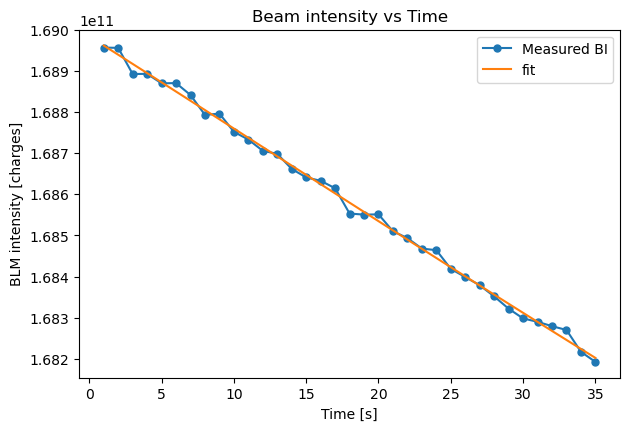

In [83]:
norm_l1 = 3.378
norm_l2 = 3.378
meanlim = 1.5 #?????


for i in range(len(t)):
	if actualpos[i] == norm_l1:
		t1 = t[i]
	if actualpos[i] == norm_l2:
		t2 = t[i]
t_lim =  35 
t_fit = []
beamint_fit = []

for i in range(len(t)):
	if t[i] <= t_lim:
		t_fit.append(t[i])
		beamint_fit.append(beamint[i])

theta = [i for i in Ttheta]

f0 = plt.figure(0)
plt.title('Beam intensity vs Time')
plt.plot(t, beamint, label='Measured BI', marker='o', markersize=5)
p = np.polyfit(t_fit, beamint_fit, 3)
# p = np.polyfit(t_fit, beamint_fit, 5)
y = np.polyval(p, t)
plt.plot(t, y, label='fit')
plt.xlabel('Time [s]')
plt.ylabel('BLM intensity [charges]')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()

f0.show()
f0.tight_layout(rect=[0, 0.03, 1, 0.95])
#f0.savefig(oBeamInt)



/tmp/cmaccani/ipykernel_15152/1111496814.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f1.show()


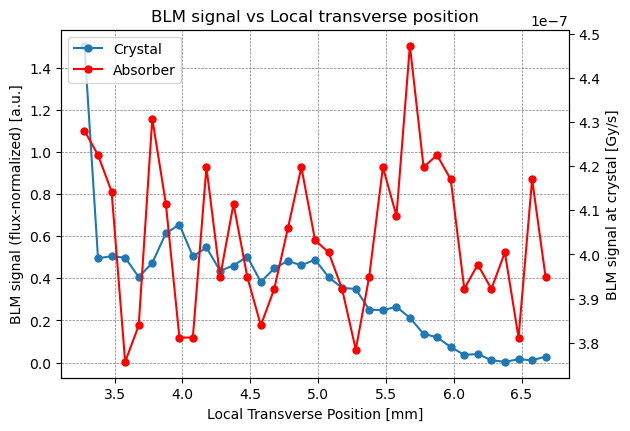

In [84]:
q = np.polyder(p)
signalblm_norm = []
errblm_norm = []


for i in range(len(t)):
	if actualpos[i] == norm_l1:
		norm_s1 = signalblm[i]/np.polyval(q,t[i])
	if actualpos[i] == norm_l2:
		norm_s2 = signalblm[i]/np.polyval(q,t[i])
normal = (norm_s1+norm_s2)/2.
norm_l = (norm_l1+norm_l2)/2.
# normal = normal*2.5/5
# print normal

count_norm = 0
mean_norm = []
for i in range(len(actualpos)):
	if actualpos[i] <= norm_l and actualpos[i] >= norm_l-meanlim:
		mean_norm.append(signalblm[i]/np.polyval(q,t[i]))
		count_norm += 1
normal = sum(mean_norm)/count_norm

for i in range(len(t)):
	signalblm_norm.append(signalblm[i]/abs(np.polyval(q,t[i])*normal))
	errblm_norm.append(errblm[i]/abs(np.polyval(q,t[i])*normal))

f1 = plt.figure(1)
ax3 = f1.add_subplot(111)
ax4 = ax3.twinx()
plt.title('BLM signal vs Local transverse position')
ax3.plot(actualpos, signalblm_norm, marker='o', markersize=5, label='Crystal')
ax4.plot(actualpos, signalcry, marker='o', markersize=5, color='red', label='Absorber')
ax3.set_xlabel('Local Transverse Position [mm]')
ax3.set_ylabel('BLM signal (flux-normalized) [a.u.]')
ax4.set_ylabel('BLM signal at crystal [Gy/s]')
ax3.grid(color='gray', linestyle='--', linewidth=0.5)
ax4.yaxis.grid(False)
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
plt.legend(lines3+lines4, labels3+labels4, fontsize=10, loc=2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

f1.show()
f1.tight_layout(rect=[0, 0.03, 1, 0.95])
#f1.savefig(oBLMNorm)

In [108]:
actualpos

array([6.677, 6.578, 6.478, 6.377, 6.278, 6.177, 6.078, 5.978, 5.877,
       5.778, 5.677, 5.578, 5.478, 5.377, 5.278, 5.177, 5.078, 4.978,
       4.877, 4.778, 4.677, 4.578, 4.478, 4.377, 4.278, 4.177, 4.077,
       3.978, 3.878, 3.778, 3.678, 3.578, 3.478, 3.378, 3.278])

/home/cmaccani/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:931: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
/home/cmaccani/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Height:  1.0  a.u.
Mean:  -3.5  mm
Sigma:  0.01  mm
Calculated theta [urad]:  7.797


/tmp/cmaccani/ipykernel_15152/696723733.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([int(abs(tick)) for tick in ticks])
/tmp/cmaccani/ipykernel_15152/696723733.py:90: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f2.show()


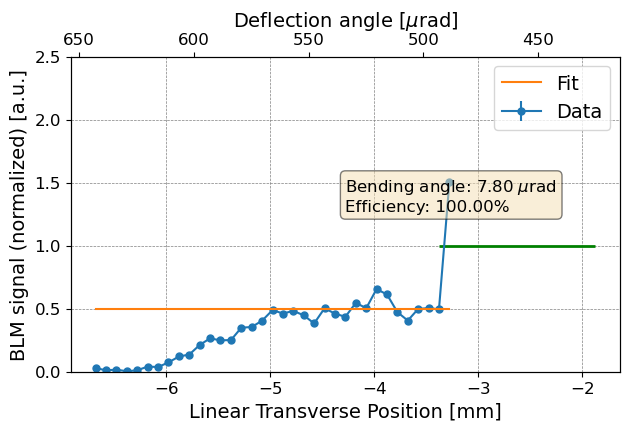

In [109]:
f2 = plt.figure(2)
maxfit = 6.677
# raw_input()

def erfunc(x,a,b,c,d):
	return a+(b/2.0)*erf((x-c)/(d*np.sqrt(2.0)))
	
param0 = [0.0,1,-3.5,0.01]

ax1 = f2.add_subplot(111)
# plt.title('BLM signal vs Local transverse position of absorber', fontsize=14, y=1.20)

actualpos_filt = []
signalblm_filt = []
errblm_filt = []
for i in range(len(actualpos)):
	if (actualpos[i]<maxfit):
		actualpos_filt.append(actualpos[i])
		signalblm_filt.append(signalblm_norm[i])
		errblm_filt.append(errblm_norm[i])

params, extras = opt.curve_fit(erfunc, actualpos_filt, signalblm_filt, p0=param0, sigma=errblm_filt)

print('Height: ', abs(params[1]), ' a.u.')
print('Mean: ', params[2], ' mm')
print('Sigma: ', abs(params[3]), ' mm')

signalblm_notnorm=[]
for i in signalblm_norm:
	signalblm_notnorm.append(i*normal)

with open(oScanNorm,'w') as oFile:
	oFile.write('# Pos SignalBLM SignalBLMNorm\n')
	writer = csv.writer(oFile,delimiter='\t')
	writer.writerows(zip(actualpos,signalblm_notnorm,signalblm_norm))


if config == 'B2V' and scan == '3':
	xenv = 1.163
else:
	xenv = abs(norm_l)
xdef = abs(params[2])
deltax = (xdef-xenv)*1.0e-3

theta_calc = (deltax-sigma1*np.sqrt(emittance*beta2)*(np.cos(deltaphi)-1))/(np.sqrt(beta2*beta1)*np.sin(deltaphi))
print('Calculated theta [urad]: ', round(theta_calc*1.0e6,3))


x1 = -xenv
y1 = 0
x2 = -xdef
y2 = theta_calc*1.0e6
m = (y2-y1)/(x2-x1)
q = y1-m*x1


actualpos_pos = [-i for i in actualpos]
actualpos_conv = [m*(-i)+q for i in actualpos_pos]


# ax1.plot(actualpos, abs(params[1])*norm.pdf(actualpos,params[2],abs(params[3])), label='Ch beam profile', color='green')
ax3 = ax1.twiny()
ax1.errorbar(actualpos_pos, signalblm_norm, yerr=errblm_norm, label='Data', marker='o', markersize=5)
ax1.plot(actualpos_pos, erfunc(actualpos, *params), label='Fit', zorder=10)
ax3.plot(actualpos_conv, signalblm_norm, alpha=0.0)
ticks = ax3.get_xticks()
ax3.set_xticklabels([int(abs(tick)) for tick in ticks])
ax1.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel('Linear Transverse Position [mm]', fontsize=14)
ax1.set_ylabel('BLM signal (normalized) [a.u.]', fontsize=14)
# ax1.set_ylabel('Channeled beam profile [a.u.]', fontsize=12)
ax3.set_xlabel('Deflection angle [$\mu$rad]', fontsize=14)
ax1.hlines(y=1, xmin=-norm_l, xmax=-norm_l+meanlim, linewidth=2, color='green')
# ax1.get_yaxis().set_visible(False)
if config == 'B2V' and scan == '3':
	ax1.set_ylim(0,5)
else:
	ax1.set_ylim(0,2.5)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
# ax1.yaxis.grid(False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
lines1, labels1 = ax1.get_legend_handles_labels()
plt.legend(lines1, labels1, fontsize=14, loc=1)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
textstr = 'Bending angle: %.2f $\mu$rad\nEfficiency: %.2f' % (round(theta_calc*1.0e6,3),round(abs(params[1])*100,2),)+'%'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.5, 0.5, textstr, transform=ax1.transAxes, fontsize=12, verticalalignment='bottom', bbox=props)

f2.show()
f2.tight_layout(rect=[0, 0.03, 1, 0.95])
#f2.savefig(oBLMFit)

/tmp/cmaccani/ipykernel_15152/3778944221.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f3.show()


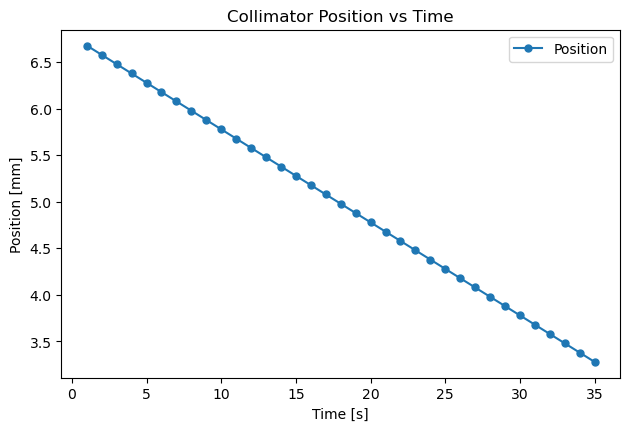

In [110]:
f3 = plt.figure(3)
plt.title('Collimator Position vs Time')
plt.plot(t, collpos, label='Position', marker='o', markersize=5)
plt.xlabel('Time [s]')
plt.ylabel('Position [mm]')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()

f3.show()
f3.tight_layout(rect=[0, 0.03, 1, 0.95])
#f0.savefig(oBeamInt)

/tmp/cmaccani/ipykernel_15152/3721430512.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f4.show()


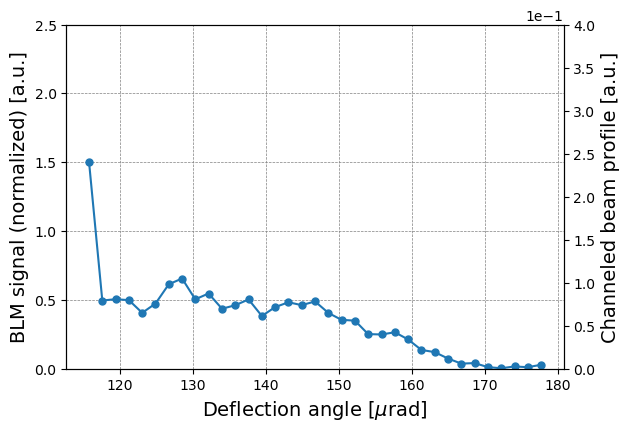

In [115]:
angle = []
for i in range(len(actualpos)):
#	print (((actualpos_pos[i]-xenv)*1.0e-3)-sigma1*np.sqrt(emittance*beta2)*(np.cos(deltaphi)-1))/(np.sqrt(beta2*beta1)*np.sin(deltaphi))*1.0e6
	angle.append(-(((actualpos_pos[i]-xenv)*1.0e-3)-sigma1*np.sqrt(emittance*beta2)*(np.cos(deltaphi)-1))/(np.sqrt(beta2*beta1)*np.sin(deltaphi))*1.0e6)

angle_filt = []
signalblm_filt_2 = []
errblm_filt_2 = []
for i in range(len(angle)):
	if config == 'B2H':
		if (angle[i]<-30):
			angle_filt.append(angle[i])
			signalblm_filt_2.append(signalblm_norm[i])
			errblm_filt_2.append(errblm_norm[i])
	else:
		if (angle[i]<-20):
			angle_filt.append(angle[i])
			signalblm_filt_2.append(signalblm_norm[i])
			errblm_filt_2.append(errblm_norm[i])

param0_2 = param0

#params_2, extras_2 = opt.curve_fit(erfunc, angle_filt, signalblm_filt_2, p0=param0_2, sigma=errblm_filt_2)
"""print('Height: ', abs(params_2[1]), ' a.u.')
print('Mean: ', params_2[2], ' urad')
print('Sigma: ', abs(params_2[3]), ' urad')"""

f4 = plt.figure(4)
ax4 = f4.add_subplot(111)
ax5 = ax4.twinx()
# ax5.get_yaxis().set_visible(False)
ax4.errorbar(angle, signalblm_norm, yerr=errblm_norm, label='Data', marker='o', markersize=5)
#ax5.plot(angle, abs(params_2[1])*norm.pdf(angle,params_2[2],abs(params_2[3])), label='Ch beam profile', color='green')
#ax4.plot(angle, erfunc(angle, *params_2), label='Fit', zorder=10)
ax4.set_xlabel('Deflection angle [$\mu$rad]', fontsize=14)
ax4.set_ylabel('BLM signal (normalized) [a.u.]', fontsize=14)
ax5.set_ylabel('Channeled beam profile [a.u.]', fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
if config == 'B2V' and scan == '3':
	ax4.set_ylim(0,5)
	ax5.set_ylim(0,2.5)
else:
	ax4.set_ylim(0,2.5)
	ax5.set_ylim(0,0.4)
ax4.grid(color='gray', linestyle='--', linewidth=0.5)

f4.show()
f4.tight_layout(rect=[0, 0.03, 1, 0.95])
#f4.savefig('BLMSignalNormFit__'+config+'_'+scan+'FT_withChprofile.png')